In [1]:
system("gdown --id 1efP5VJQuhmH1qDti7Mw1esqJ1nMItOuz")

In [2]:
install.packages("Amelia")
install.packages('corrplot')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages('rattle')
install.packages('RColorBrewer')
install.packages("factoextra")
install.packages('clue')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘httpuv’, ‘car’, ‘DT’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("Amelia")
library("corrplot")
library("caret")

In [ ]:
install.packages("BMA")
library("BMA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. Đọc dữ liệu và đưa vào dataframe data.

In [ ]:
data <- read.csv("Churn_Modelling.csv")

2. In thông tin dữ liệu: head(), str(), số dòng, số cột, summary...

In [ ]:
head(data)
str(data)
nrow(data)
ncol(data)
summary(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


'data.frame':	10000 obs. of  14 variables:
 $ RowNumber      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CustomerId     : int  15634602 15647311 15619304 15701354 15737888 15574012 15592531 15656148 15792365 15592389 ...
 $ Surname        : chr  "Hargrave" "Hill" "Onio" "Boni" ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ Geography      : chr  "France" "Spain" "France" "France" ...
 $ Gender         : chr  "Female" "Female" "Female" "Female" ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance        : num  0 83808 159661 0 125511 ...
 $ NumOfProducts  : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard      : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


[1] 10000

[1] 14

   RowNumber       CustomerId         Surname           CreditScore   
 Min.   :    1   Min.   :15565701   Length:10000       Min.   :350.0  
 1st Qu.: 2501   1st Qu.:15628528   Class :character   1st Qu.:584.0  
 Median : 5000   Median :15690738   Mode  :character   Median :652.0  
 Mean   : 5000   Mean   :15690941                      Mean   :650.5  
 3rd Qu.: 7500   3rd Qu.:15753234                      3rd Qu.:718.0  
 Max.   :10000   Max.   :15815690                      Max.   :850.0  
  Geography            Gender               Age            Tenure      
 Length:10000       Length:10000       Min.   :18.00   Min.   : 0.000  
 Class :character   Class :character   1st Qu.:32.00   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median :37.00   Median : 5.000  
                                       Mean   :38.92   Mean   : 5.013  
                                       3rd Qu.:44.00   3rd Qu.: 7.000  
                                       Max.   :92.00   Max.   :10.000  

3. Tiền xử lý dữ liệu. Trực quan hóa để tìm hiểu về dữ liệu.

In [ ]:
# Xóa các cột dữ liệu không cần thiết
data <- data[, c("CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance",
                 "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited")]

In [ ]:
# Kiểm tra dữ liệu thiếu
sum(is.na(data))

[1] 0

In [ ]:
# Kiểm tra biến unique
unique(data$Geography)
unique(data$Gender)

[1] "France"  "Spain"   "Germany"

[1] "Female" "Male"

In [ ]:
print(table(data$Geography))
print(table(data$Gender))


 France Germany   Spain 
   5014    2509    2477 

Female   Male 
  4543   5457 


In [ ]:
data$Geography <- ifelse(data$Geography == "France", 2, ifelse(data$Geography=="Spain",1,0))
data$Gender <- ifelse(data$Gender == "Female", 1, 0)

In [ ]:
print(table(data$Geography))
print(table(data$Gender))


   0    1    2 
2509 2477 5014 

   0    1 
5457 4543 


In [ ]:
# Sử dụng BMA để chọn biến xây dựng model
yvar = data[, ("Exited")]
xvars = data[, c("CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance",
                 "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary")]
bma = bicreg(xvars, yvar, strict=F, OR=2)

In [ ]:
print(summary(bma))


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                 p!=0   EV         SD         model 1   
Intercept        100   -1.590e-01  1.755e-02  -1.590e-01
CreditScore        0    0.000e+00  0.000e+00       .    
Geography        100   -5.396e-02  4.789e-03  -5.396e-02
Gender           100    7.563e-02  7.485e-03   7.563e-02
Age              100    1.116e-02  3.569e-04   1.116e-02
Tenure             0    0.000e+00  0.000e+00       .    
Balance          100    4.574e-07  6.369e-08   4.574e-07
NumOfProducts      0    0.000e+00  0.000e+00       .    
HasCrCard          0    0.000e+00  0.000e+00       .    
IsActiveMember   100   -1.424e-01  7.481e-03  -1.424e-01
EstimatedSalary    0    0.000e+00  0.000e+00       .    
                                                        
nVar                                             5      
r2                                             0.146    
B

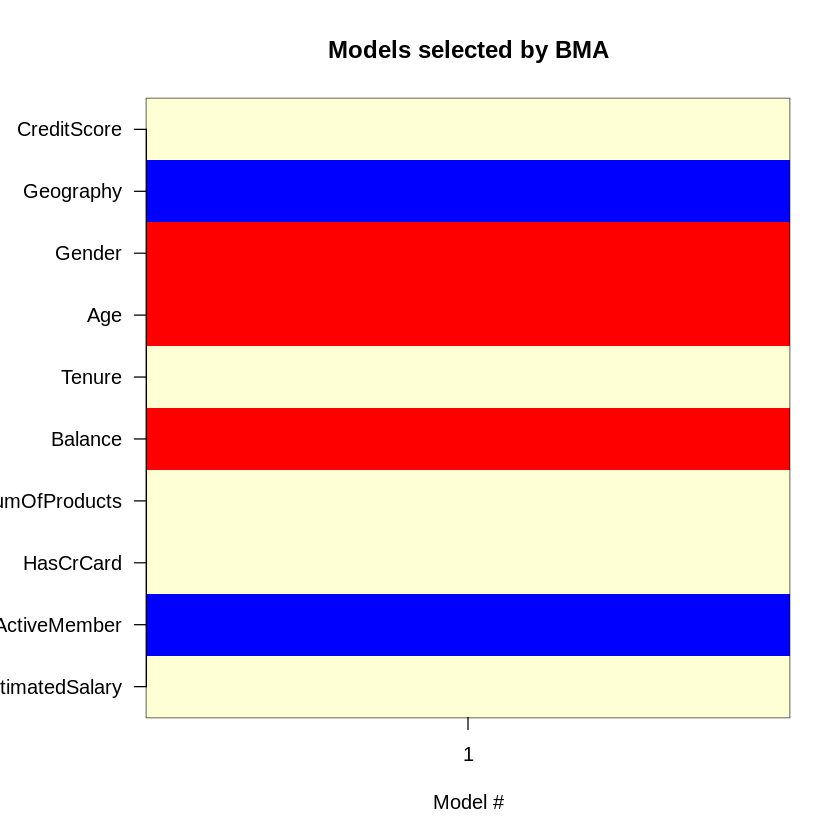

In [ ]:
imageplot.bma(bma)

Nhận xét:
- Từ đây ta có thể thấy các biến Geography, Gender, Age, Balance, IsActiveMember thích hợp dùng để dự đoán khả năng khách hàng có "rời bỏ" hay không tốt hơn các biến còn lại và tiết kiệm thời gian khi xây dựng model dự đoán.

In [ ]:
finaldata <- data[c("Geography","Gender","Age","Balance","IsActiveMember","Exited")]

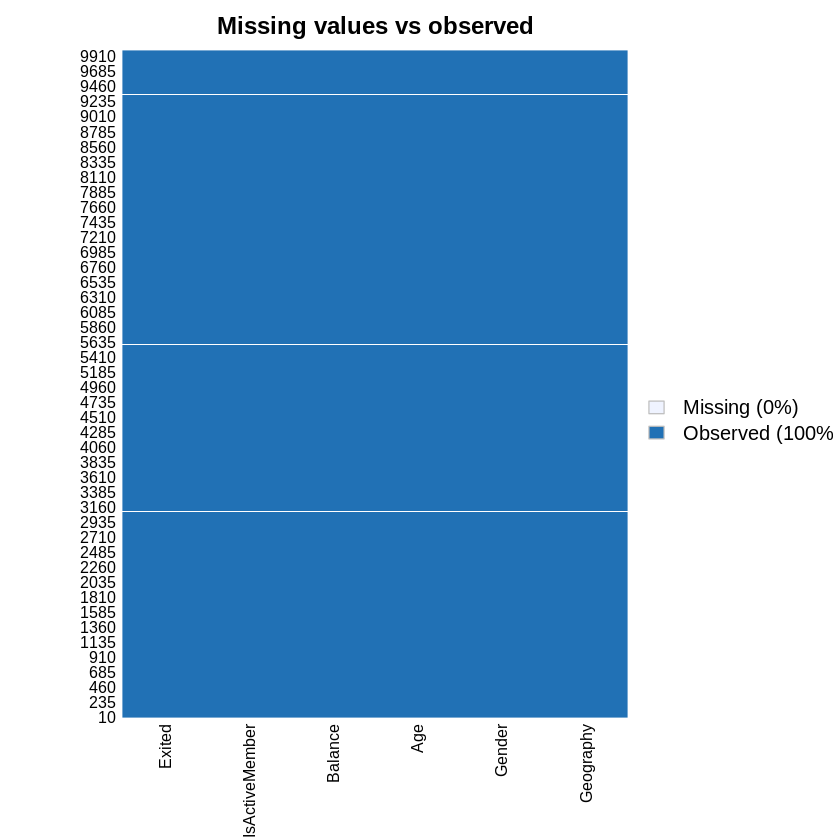

In [ ]:
# Kiểm tra lại dữ liệu thiếu
missmap(finaldata, main="Missing values vs observed")

In [ ]:
# Đếm thành phần trong các nhóm biến Exited
print(table(finaldata$Exited))


   0    1 
7963 2037 


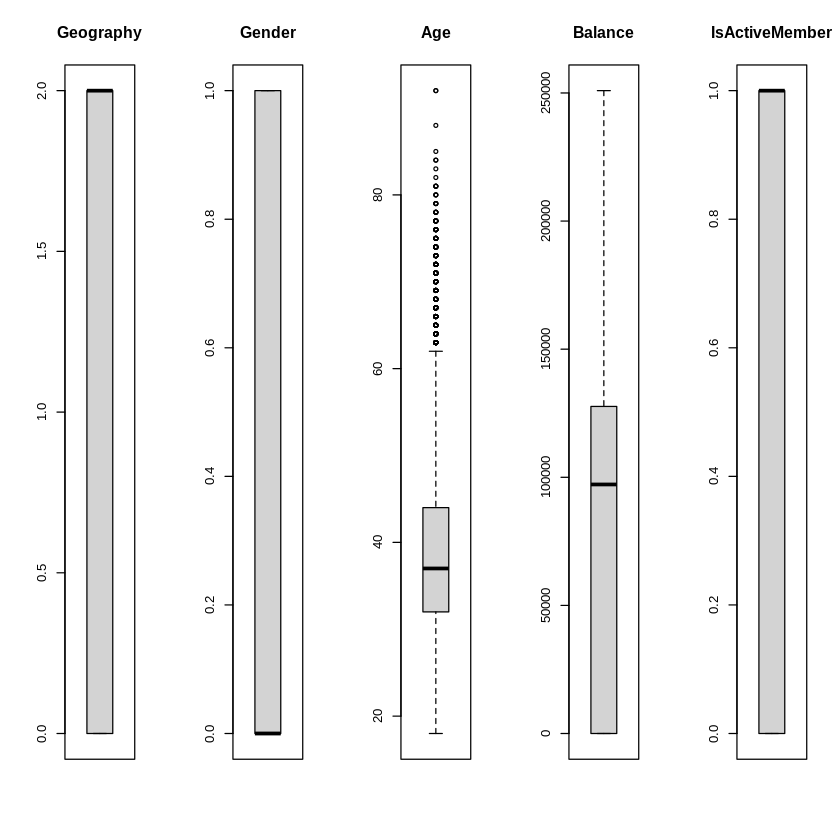

In [ ]:
# Vẽ boxplot để kiểm tra outliers
par(mfrow=c(1,5))
boxplot(finaldata$Geography, main="Geography")
boxplot(finaldata$Gender, main="Gender")
boxplot(finaldata$Age, main="Age")
boxplot(finaldata$Balance, main="Balance")
boxplot(finaldata$IsActiveMember, main="IsActiveMember")

In [ ]:
# Xử lí outliers
age_outliers <- boxplot.stats(finaldata$Age)$out
length(age_outliers)

[1] 359

In [ ]:
print(paste("Before drop: ",nrow(finaldata)))

[1] "Before drop:  10000"


In [ ]:
finaldata <- subset(finaldata, !(Age %in% age_outliers))
print(paste("After drop: ",nrow(finaldata)))

[1] "After drop:  9641"


4. Tạo train và test từ dữ liệu data.

In [ ]:
set.seed(42)
n = nrow(finaldata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train <- finaldata[trainIndex,]
test <- finaldata[-trainIndex,]
print("Rows of training data and test data:")
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 6749
[1] 2892


5. Xây dựng model với train. In summary của model.

In [ ]:
# Logistic Regression
mylogit <- glm(Exited~., data=train, family="binomial")
print(summary(mylogit))


Call:
glm(formula = Exited ~ ., family = "binomial", data = train)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.664e+00  1.954e-01 -28.987  < 2e-16 ***
Geography      -3.012e-01  4.221e-02  -7.135 9.64e-13 ***
Gender          5.662e-01  6.820e-02   8.302  < 2e-16 ***
Age             1.114e-01  4.095e-03  27.211  < 2e-16 ***
Balance         3.575e-06  6.003e-07   5.955 2.61e-09 ***
IsActiveMember -8.904e-01  7.039e-02 -12.650  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6779.9  on 6748  degrees of freedom
Residual deviance: 5495.4  on 6743  degrees of freedom
AIC: 5507.4

Number of Fisher Scoring iterations: 5



In [ ]:
library(rpart)
library(rpart.plot)
library(rattle)
library(RColorBrewer)

In [ ]:
# Decision Tree
exited.tree = rpart(Exited~Geography + Gender + Age + Balance + IsActiveMember,data=train, method="class" )
exited.tree

n= 6749 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 6749 1359 0 (0.7986368 0.2013632)  
   2) Age< 42.5 4995  570 0 (0.8858859 0.1141141) *
   3) Age>=42.5 1754  789 0 (0.5501710 0.4498290)  
     6) IsActiveMember>=0.5 887  274 0 (0.6910936 0.3089064) *
     7) IsActiveMember< 0.5 867  352 1 (0.4059977 0.5940023)  
      14) Age< 50.5 592  276 0 (0.5337838 0.4662162)  
        28) Geography>=0.5 398  153 0 (0.6155779 0.3844221) *
        29) Geography< 0.5 194   71 1 (0.3659794 0.6340206) *
      15) Age>=50.5 275   36 1 (0.1309091 0.8690909) *

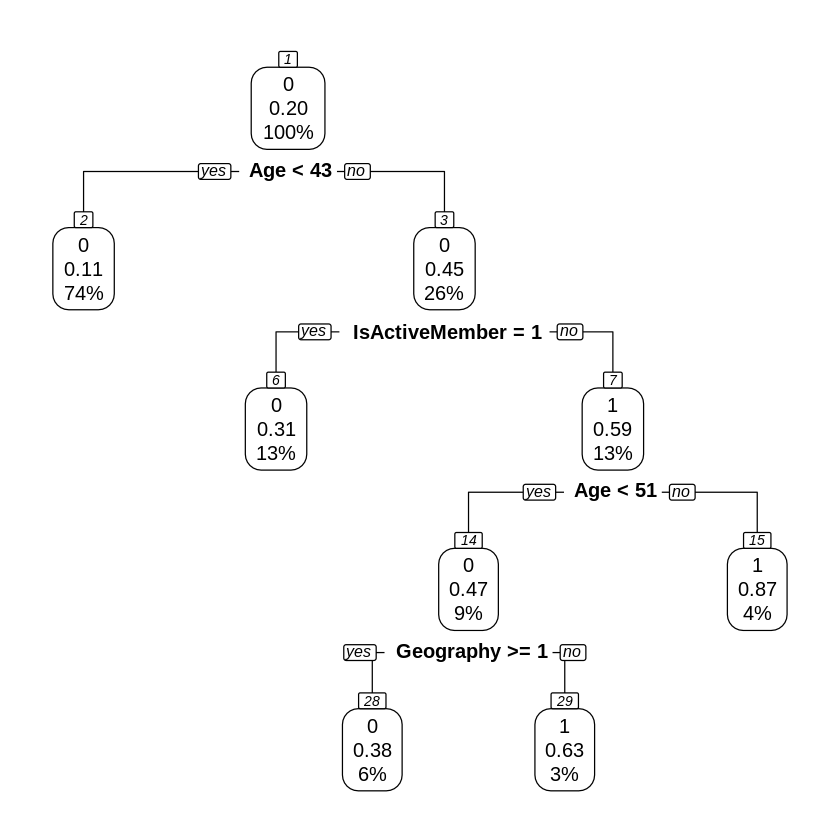

In [ ]:
prp(exited.tree, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

6. Dự đoán y_pred từ test => so sánh với y_test.

In [ ]:
# Logistic Regression
pred_logit = predict(mylogit, newdata=test, type="response")
pred_values <- ifelse(pred_logit > 0.5, 1, 0)
print("Testdata exited vs predict (10 rows:)")
result_logit <- data.frame(testExited = test$Exited[30:40], pred_values[30:40])
print(result_logit)

[1] "Testdata exited vs predict (10 rows:)"
    testExited pred_values.30.40.
109          0                  0
110          1                  0
111          0                  0
112          0                  0
117          0                  0
118          0                  0
119          1                  0
120          0                  0
127          1                  0
131          0                  0
136          0                  1


In [ ]:
# Tính độ chính xác của model Logistic Regression
library("caret")
confusionMatrix(as.factor(pred_values), as.factor(test$Exited))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2189  463
         1   98  142
                                          
               Accuracy : 0.806           
                 95% CI : (0.7911, 0.8203)
    No Information Rate : 0.7908          
    P-Value [Acc > NIR] : 0.02262         
                                          
                  Kappa : 0.2466          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9571          
            Specificity : 0.2347          
         Pos Pred Value : 0.8254          
         Neg Pred Value : 0.5917          
             Prevalence : 0.7908          
         Detection Rate : 0.7569          
   Detection Prevalence : 0.9170          
      Balanced Accuracy : 0.5959          
                                          
       'Positive' Class : 0               
                        

In [ ]:
# Decision Tree
newdf <- test[, 1:5]
head(newdf)
pred_tree <- predict(exited.tree, newdf)

,Geography,Gender,Age,Balance,IsActiveMember
,<dbl>,<dbl>,<int>,<dbl>,<int>
6,1,0,44,113755.8,0
10,2,0,27,134603.9,1
12,1,0,24,0.0,0
13,2,1,34,0.0,0
14,2,1,25,0.0,0
20,2,1,24,0.0,1


In [ ]:
predictions <- ifelse(pred_tree[, 2] > 0.5, 1, 0)

In [ ]:
mse_tree <- mean((test$Exited - predictions)^2)
print(mse_tree)

[1] 0.1773859


In [ ]:
# Tính độ chính xác của Decision Tree
confusionMatrix(as.factor(predictions), as.factor(test$Exited))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2249  475
         1   38  130
                                          
               Accuracy : 0.8226          
                 95% CI : (0.8082, 0.8364)
    No Information Rate : 0.7908          
    P-Value [Acc > NIR] : 1.012e-05       
                                          
                  Kappa : 0.27            
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9834          
            Specificity : 0.2149          
         Pos Pred Value : 0.8256          
         Neg Pred Value : 0.7738          
             Prevalence : 0.7908          
         Detection Rate : 0.7777          
   Detection Prevalence : 0.9419          
      Balanced Accuracy : 0.5991          
                                          
       'Positive' Class : 0               
                        

7. Đánh giá model.

- Decision Tree có độ chính xác - **Accuracy** cao hơn (82.26%) so với Logistic Regression (80.6%).
- Decision Tree có giá trị **Kappa** cao hơn (0.27) so với Logistic Regression (0.2466). Giá trị Kappa cao hơn cho biết mô hình dự đoán tốt hơn so với dự đoán ngẫu nhiên.
- Cả hai mô hình đều có **P-Value** nhỏ hơn 0.05, cho biết độ chính xác cao hơn so với dự đoán ngẫu nhiên. Tuy nhiên, P-Value của ** Decision Tree** nhỏ hơn đáng kể (1.012e-05) so với Logistic Regression (0.02262), **cho thấy sự vượt trội về độ tin cậy của mô hình.**
- Decision Tree có độ nhạy - **sensitivity** cao hơn (0.9834) so với Logistic Regression (0.9571). Độ nhạy cao cho biết khả năng dự đoán chính xác các trường hợp khách hàng "rời bỏ" (lớp 1).

==> **Decision Tree phù hợp hơn** cho bộ dữ liệu này vì có Accuracy cao hơn và khả năng phát hiện các trường hợp Positive tốt hơn so với Logistic Regression.